###Questão 5

*Pesquise e apresente um trabalho sobre lógica fuzzy com uma ou mais aplicações*

Neste trabalho disponível no Kaggle (conforme link abaixo), estaremos analisando o risco de liberar um financiamento baseado no valor proposto (funding) e o tamanho da equipe (staffing), junto à lógica fuzzy poderemos visualizar que de acordo com o tamanho da equipe e do valor do financiamento pode apresentar muito risco ou não à empresa financiadora (banco).

Nele podemos alterar os valores dos parâmetros de valor e equipe para simular vários cenários onde o financiamento pode ter um alto risco, baixo risco, ou risco médio.

O valor do risco pode ser impresso e visualizado como uma reta de cor preta no gráfico, que mostra o sombreamento entre as áreas que representam o valor do risco para o financiamento, que vai entre o valor 0 até o valor 100.

Disponível em: https://www.kaggle.com/code/towsifahamed/tipping-solution-using-fuzzy-logic

In [15]:
!pip install scikit-fuzzy >log
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

30.28865979381444


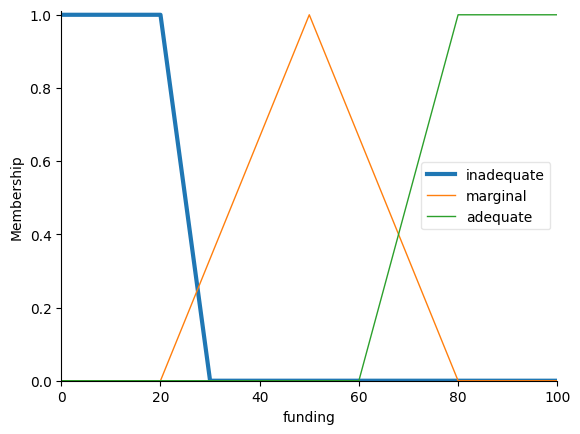

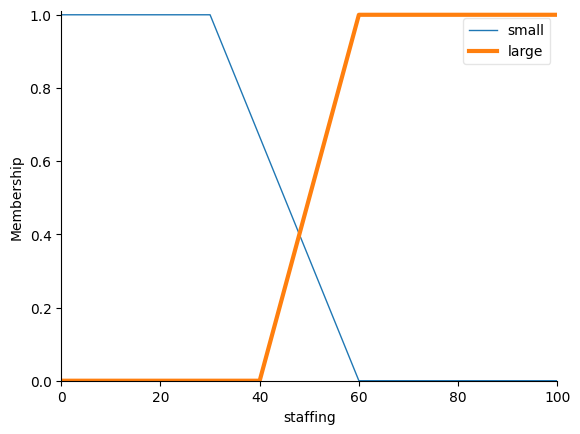

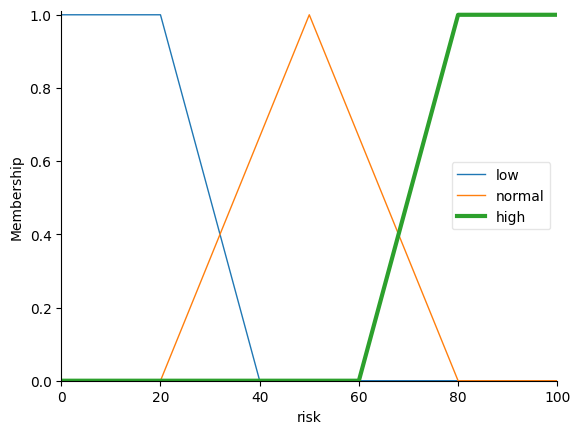

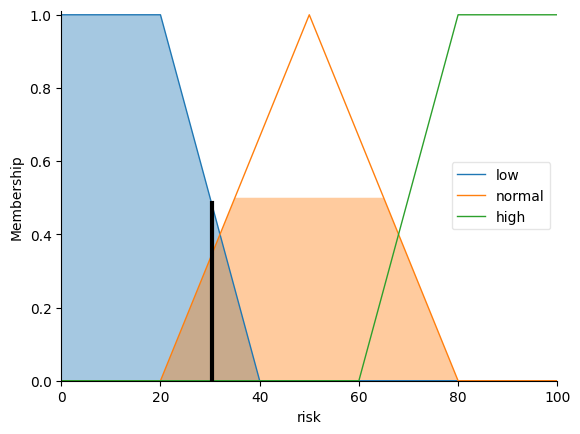

In [16]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding' )
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing' )
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk' )
# Auto-membership function population is possible with .automf(3, 5, or 7)
#quality.automf(3)
#service.automf(3)

# Especificando os valores a serem analisados no gráfico gerado para o financiamento
# Inadequado, marginal/fronteira e adequado
funding[ 'inadequate' ] = fuzz.trapmf(funding.universe, [ 0,0, 20, 30])
funding[ 'marginal' ] = fuzz.trimf(funding.universe, [ 20, 50, 80])
funding[ 'adequate' ] = fuzz.trapmf(funding.universe, [ 60, 80, 100,100])

#service[ 'bad' ] = fuzz.trimf(service.universe, [ 0, 0, 50])

# Especificando os valores a serem analisados no gráfico gerado para a equipe
# Equipe pequena ou grande
staffing[ 'small' ] = fuzz.trapmf(staffing.universe, [ 0, 0, 30, 60])
staffing[ 'large' ] = fuzz.trapmf(staffing.universe, [ 40, 60, 100, 100])
# Custom membership functions can be built interactively with a familiar,
# Pythonic API

# Especificando os valores a serem analisados no gráfico gerado para o risco
# Equipe baixo, normal e alto
risk[ 'low' ] = fuzz.trapmf(risk.universe, [ 0,0,20, 40])
risk[ 'normal' ] = fuzz.trimf(risk.universe, [ 20, 50, 80])
risk[ 'high' ] = fuzz.trapmf(risk.universe, [ 60, 80, 100,100 ])


# You can see how these look with .view()
# Testando com as seguintes condições, a visualização em um gráfico que mostrará
# como que ficará a distribuição de acordo com a lógica fuzzy
funding[ 'inadequate' ].view()
staffing['large'].view()
risk['high'].view()

# Cria regras para que seja possível simular o sistema com a lógica fuzzy
rule1 = ctrl.Rule(funding[ 'adequate' ] | staffing[ 'small' ], risk[ 'low' ])
rule2 = ctrl.Rule(staffing[ 'small' ] & funding[ 'marginal' ], risk[ 'normal' ])
rule3 = ctrl.Rule(funding[ 'inadequate' ] | staffing[ 'large' ], risk[ 'high' ])
#rule1.view()
#rule2.view()

# Com o uso da biblioteca ctrl pode-se testar o risco de acordo com as regras
# definidas anteriormente e simular
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
final_risk = ctrl.ControlSystemSimulation(risk_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
final_risk.input[ 'funding' ] = 35 # Definido o valor para o financiamento
final_risk.input[ 'staffing' ] = 30 # Definido o valor para o tamanho da equipe
# Crunch the numbers
final_risk.compute()
# final_risk.compute_rule(rule1)

print (final_risk.output[ 'risk' ]) #Risco final impresso no console
risk.view(sim=final_risk) #Geração do gráfico com os parâmetros para o financiamento, tamanho da equipe e o risco, dados os parâmetros, podemos ver que o risco é considerado baixo

84.44444444444444


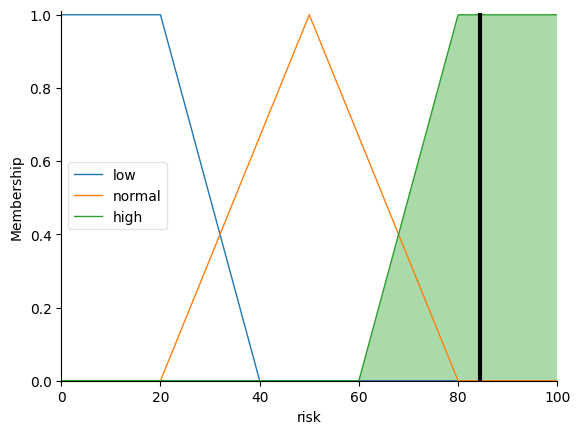

In [17]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
final_risk.input[ 'funding' ] = 10 # Financiamento baixo
final_risk.input[ 'staffing' ] = 80 # Equipe grande => Risco alto
# Crunch the numbers
final_risk.compute()
print (final_risk.output[ 'risk' ])
risk.view(sim=final_risk)

15.555555555555555


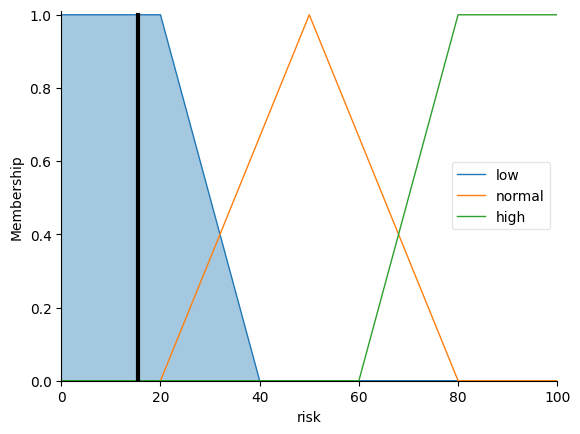

In [18]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
final_risk.input[ 'funding' ] = 90
final_risk.input[ 'staffing' ] = 10
# Crunch the numbers
final_risk.compute()
print (final_risk.output[ 'risk' ])
risk.view(sim=final_risk)